# Analysis for RNA-DNA p-brain tissue sample

2021-04-23 smRNA and 04-26 CTP-09 MOP marker gene DNA-MERFISH

by Pu Zheng

2020.04.30


cortex: 2-7
thalamus 83-88
hippo: 63,64,66,67,68,70

# 0. required packages for h5py

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

23172


# 1. Create field-of-view class

In [2]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20210706-P_Forebrain_CTP09_only',
             'save_folder':r'N:\Pu_Temp\20210706-P_Forebrain_CTP09_only',
             'experiment_type': 'DNA',
             'num_threads': 10,
             #'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210514-Corrections_2color_50_new_fiber',
             'correction_folder':r'W:\Corrections\20210621-Corrections_lumencor',
             'shared_parameters':{
                     'single_im_size':[60,2048,2048],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':False,
                     'min_num_seeds':250,
                     'max_num_seeds': 2000,
                     'spot_seeding_th': 600,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 }, 
             'ref_id': 0, # special for this experiment
             }

In [3]:
# process fov in batch
#fov_ids = np.concatenate([np.arange(2,8), np.arange(83,89), [63,64,66,67,68,70]])
fov_ids = [3,4]

for _fov_id in fov_ids:
    # create fov class
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              )
    # 2. Process image into candidate spots
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=False, 
                                _overwrite_drift=False, _overwrite_image=False,
                                _overwrite_spot=False,
                                _verbose=True)
    
    # 3. process and warp gene images
    fov.gene_ref_id = 0
    fov._process_image_to_spots('gene', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=True, 
                                _fit_spots=False,
                                _overwrite_drift=False, _overwrite_image=False,
                                _overwrite_spot=False,
                                _verbose=True)    
    # 4. load dapi image
    dapi_im = fov._load_dapi_image(_dapi_id=1)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 37
- Number of field of views: 90
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210706-P_Forebrain_CTP09_only\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H1R1', 'H2R2', 'H3R3', 'H4C1', 'H5C2', 'H6C3', 'H7C4', 'H8C5', 'H9C6', 'H10C7', 'H11C8', 'H12C9', 'H13C10', 'H14C11', 'H15C12', 'H16C13', 'H17C14', 'H18C15', 'H19C16', 'H20C17', 'H21C18', 'H22C19', 'H23C20', 'H24C21', 'H25C22', 'H26C23', 'H27C24', 'H28C25', 'H29C26', 'H30C27', 'H31C28', 'H32C29', 'H33C30', 'H34GM1', 'H35GM2', 'H36GM3'])
- 33 folders are found according to color-usage annotation.
+ loading fov_info from file: N:\Pu_Temp\20210706-P_Forebrain_CTP09_only\Conv_zscan_03.hdf5
++ base attributes loaded:['combo_ref_im', 'gene_ref_im'] in 6.313s.
+ loading correction from file: N:\Pu_Temp\20210706-P_Forebrain_CTP09_only\Conv_zscan_03.hdf5
++ load chromatic correction profile directly from save

-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210706-P_Forebrain_CTP09_only\H4C1\Conv_zscan_04.dax  in 4.965s
-- removing hot pixels for channels:['488'] in 8.383s
-- illumination correction for channels: 488, in 2.703s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 16.743s
-- saving fov_info to file: N:\Pu_Temp\20210706-P_Forebrain_CTP09_only\Conv_zscan_04.hdf5
++ base attributes saved:['combo_ref_im'] in 11.580s.
-- checking combo, region:[1 2] in 0.004s.
-- checking combo, region:[3 4] in 0.003s.
-- checking combo, region:[5 6] in 0.002s.
-- checking combo, region:[7 8] in 0.002s.
-- checking combo, region:[ 9 10] in 0.003s.
-- checking combo, region:[11 12] in 0.003s.
-- checking combo, region:[13 14] in 0.003s.
-- checking combo, region:[15 16] in 0.002s.
-- checking combo, region:[17 18] in 0.002s.
-- checking combo, region:[19 20] in 0.003s.
-- checking combo, region:[21 22] in 0.003s.
-- checking combo, region:[23 24] 

OverflowError: cannot serialize a bytes object larger than 4 GiB

In [31]:
fov._load_from_file('combo')
fov._load_from_file('gene')

+ loading combo from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_05.hdf5
++ finish loading combo in 0.012s. 
+ loading gene from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_05.hdf5
++ finish loading gene in 0.002s. 


E:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1479: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


In [33]:
fov.gene_drifts

array([], dtype=float64)

# Start from here

In [10]:
fov._load_from_file('combo')
fov._load_from_file('gene')

+ loading combo from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_03.hdf5
++ finish loading combo in 0.024s. 
+ loading gene from file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_03.hdf5
++ finish loading gene in 0.004s. 


E:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1479: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


### visualize gene_image first

In [12]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['gene']
    gene_ims = _grp['ims'][:]
    gene_ids = _grp['ids'][:]

In [ ]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['gene']
    gene_ims = _grp['ims'][:]
    gene_ids = _grp['ids'][:]

%matplotlib notebook
visual_tools.imshow_mark_3d_v2(gene_ims[:])

### load candidate chromosome

In [13]:
reload(ia.segmentation_tools.chromosome)

gene_chrom_dict = {}
for _gind, _gid in enumerate(fov.gene_ids):
    gene_chrom_dict[_gid] = ia.segmentation_tools.chromosome.identify_chromosomes(gene_ims[_gind], fov.dapi_im,
                                                                                  chrom_snr_th=1.3,
                                                                                  num_threads=fov.num_threads)

-- generate seeding image.
-- binarize image with chromosome SNR: 1.3
-- erosion and dialation with size=1.
-- find close objects.
-- random walk segmentation, beta=10.


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:467: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


-- find objects larger than size=25
-- start multiprocessing caluclate chromosome coordinates with 30 threads in 833.444s.
-- 419 chromosomes identified
-- generate seeding image.
-- binarize image with chromosome SNR: 1.3
-- erosion and dialation with size=1.
-- find close objects.
-- random walk segmentation, beta=10.
-- find objects larger than size=25
-- start multiprocessing caluclate chromosome coordinates with 30 threads in 310.605s.
-- 243 chromosomes identified
-- generate seeding image.
-- binarize image with chromosome SNR: 1.3
-- erosion and dialation with size=1.
-- find close objects.
-- random walk segmentation, beta=10.
-- find objects larger than size=25
-- start multiprocessing caluclate chromosome coordinates with 30 threads in 269.668s.
-- 212 chromosomes identified
-- generate seeding image.
-- binarize image with chromosome SNR: 1.3
-- erosion and dialation with size=1.
-- find close objects.
-- random walk segmentation, beta=10.
-- find objects larger than size=2

### save

In [12]:
fov.gene_chrom_dict = gene_chrom_dict
fov._save_to_file('fov_info', _save_attr_list=['gene_chrom_dict'])

-- saving fov_info to file: J:\Pu_Temp\20210624-P_Forebrain_smFISH_CTP09\Conv_zscan_03.hdf5
++ base attributes saved:['gene_chrom_dict'] in 0.110s.


In [14]:
gid = 2

dna_reg_ids = fov.combo_ids
dna_reg_channels = fov.combo_channels
chrom_coords = gene_chrom_dict[gid]

intensity_th = 200

from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes

print(f"input chromosomes: {len(chrom_coords)}")

kept_spots_list = []
for _spots in fov.combo_spots_list:
    kept_spots_list.append(_spots[_spots[:,0] > intensity_th])
# finalize candidate spots
cand_chr_spots_list = [[] for _ct in chrom_coords]
for _spots in kept_spots_list:
    _cands_list = assign_spots_to_chromosomes(_spots, chrom_coords)
    for _i, _cands in enumerate(_cands_list):
        cand_chr_spots_list[_i].append(_cands)

reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import convert_spots_to_hzxys

dna_cand_hzxys_list = [convert_spots_to_hzxys(_spots, fov.shared_parameters['distance_zxy'])
                       for _spots in cand_chr_spots_list]

# select_hzxys close to the chromosome center
dist_th = 3000 # upper limit is 3000nm
good_chr_th = 0.8 # 80% of regions should have candidate spots

sel_dna_cand_hzxys_list = []
sel_chrom_coords = []
chr_cand_pers = []
sel_chr_cand_pers = []
for _cand_hzxys, _chrom_coord in zip(dna_cand_hzxys_list, chrom_coords):
    _chr_cand_per = 0
    _sel_cands_list = []
    
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[(_dists < dist_th)])
            _chr_cand_per += 1
    
    _chr_cand_per *= 1/len(_cand_hzxys)
    # append
    if _chr_cand_per >= good_chr_th:
        sel_dna_cand_hzxys_list.append(_sel_cands_list)
        sel_chrom_coords.append(_chrom_coord)
        sel_chr_cand_pers.append(_chr_cand_per)
    
    chr_cand_pers.append(_chr_cand_per)
    
print(f"kept chromosomes: {len(sel_chrom_coords)}")

input chromosomes: 243
kept chromosomes: 235


+ iter:0
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.348s
--- collapse all regions into 1d.


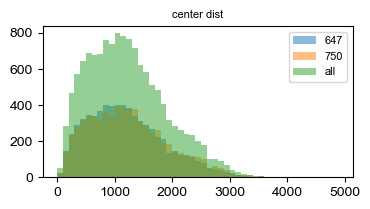

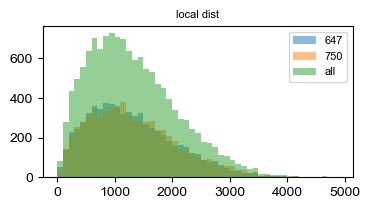

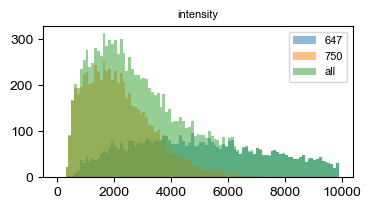

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.631s
-- region kept: 0.6614


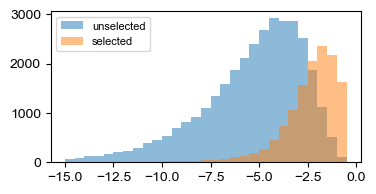

+ iter:1
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.591s
--- collapse all regions into 1d.


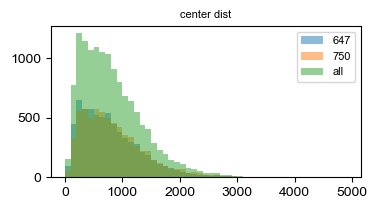

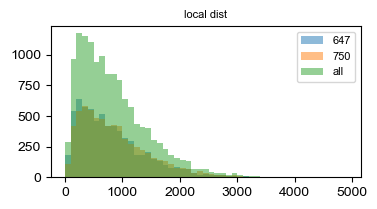

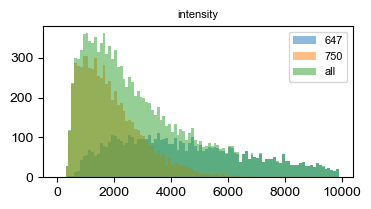

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.656s
-- region kept: 0.8715


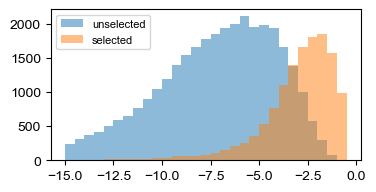

+ iter:2
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.450s
--- collapse all regions into 1d.


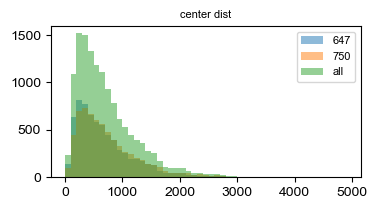

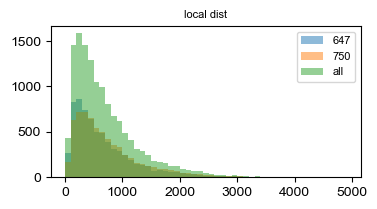

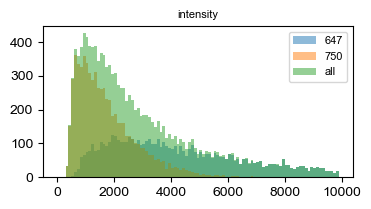

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.347s
-- region kept: 0.9488


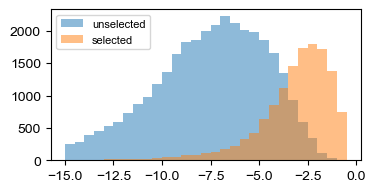

+ iter:3
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.343s
--- collapse all regions into 1d.


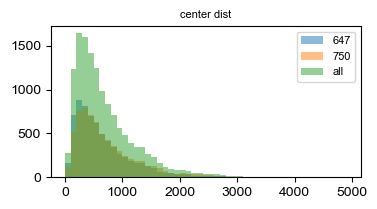

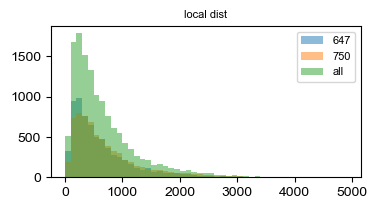

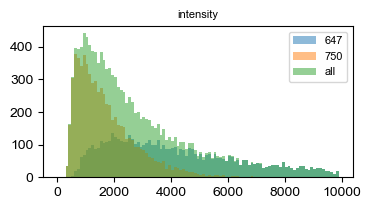

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.337s
-- region kept: 0.9786


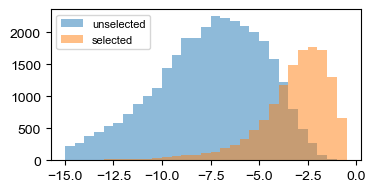

+ iter:4
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.446s
--- collapse all regions into 1d.


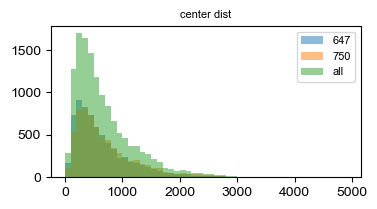

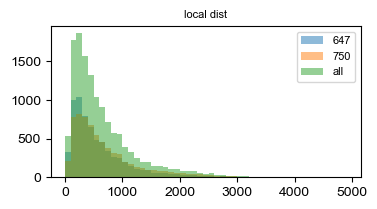

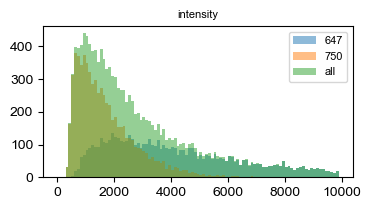

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.451s
-- region kept: 0.9894


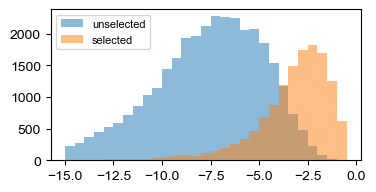

+ iter:5
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.431s
--- collapse all regions into 1d.


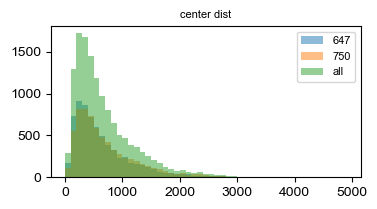

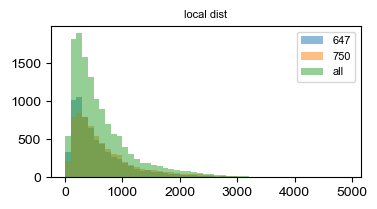

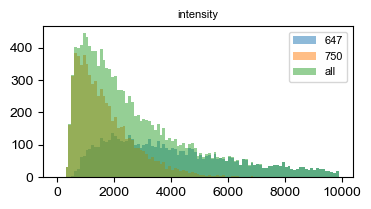

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.245s
-- region kept: 0.9925


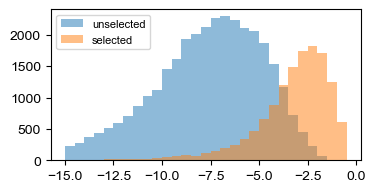

+ iter:6
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.323s
--- collapse all regions into 1d.


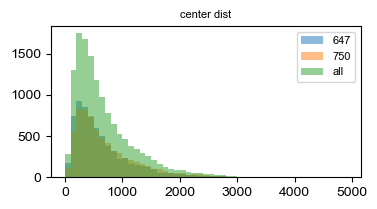

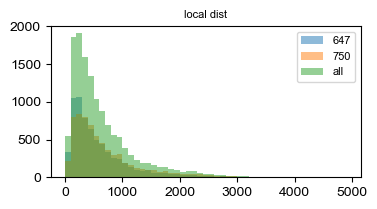

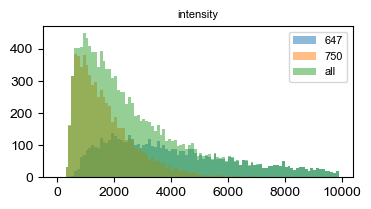

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.346s
-- region kept: 0.9958


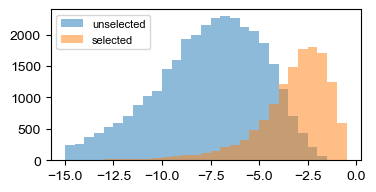

+ iter:7
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.434s
--- collapse all regions into 1d.


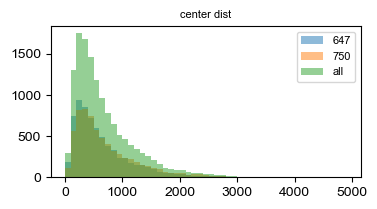

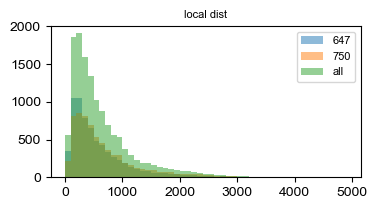

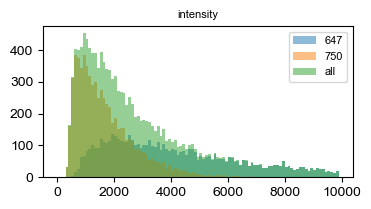

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.342s
-- region kept: 0.9967


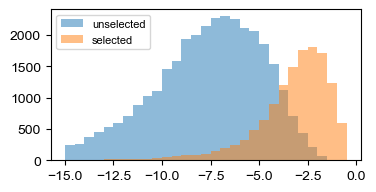

+ iter:8
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.426s
--- collapse all regions into 1d.


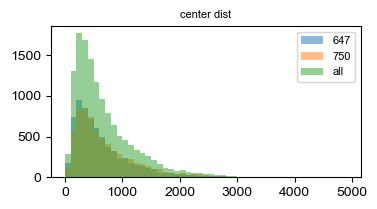

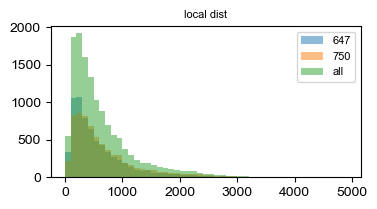

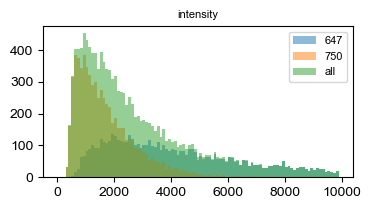

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.359s
-- region kept: 0.9971


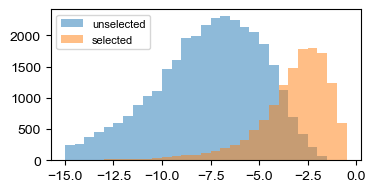

+ iter:9
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 3.439s
--- collapse all regions into 1d.


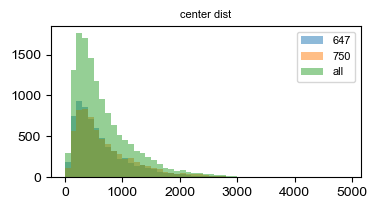

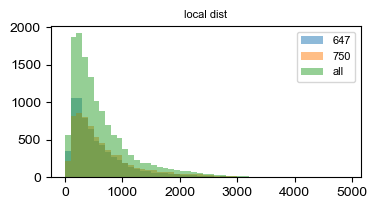

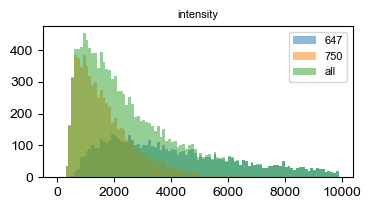

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 3.335s
-- region kept: 0.9977


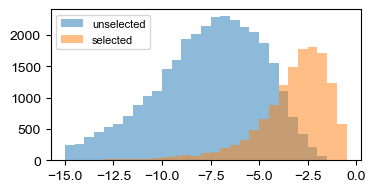

In [15]:
%matplotlib inline
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import _maximize_score_spot_picking_of_chr, pick_spots_by_intensities,pick_spots_by_scores, generate_reference_from_population, evaluate_differences

niter= 10
num_threads = 24
ref_chr_cts = None
# initialize
init_dna_hzxys = pick_spots_by_intensities(sel_dna_cand_hzxys_list)
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []

for _iter in range(niter):
    print(f"+ iter:{_iter}")
    # E: generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1], dna_reg_ids,
        ref_channels=dna_reg_channels,
        ref_chr_cts=ref_chr_cts,
        num_threads=num_threads,
        collapse_regions=True,
        split_channels=True,
        verbose=True,
    )
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_ct_dists.items():
        plt.hist(np.array(_v), bins=np.arange(0,5000,100), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('center dist', fontsize=8)
    plt.show()
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_local_dists.items():
        plt.hist(np.array(_v), bins=np.arange(0,5000,100), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('local dist', fontsize=8)
    plt.show()
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_ints.items():
        plt.hist(np.array(_v), bins=np.arange(0,10000,100), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('intensity', fontsize=8)
    plt.show()
    
    # M: pick based on scores
    sel_hzxys_list, sel_scores_list, all_scores_list, other_scores_list = \
    pick_spots_by_scores(
        sel_dna_cand_hzxys_list, dna_reg_ids,
        ref_hzxys_list=sel_dna_hzxys_list[-1], ref_ids=dna_reg_ids, ref_channels=dna_reg_channels,
        ref_ct_dists=ref_ct_dists, ref_local_dists=ref_local_dists, ref_ints=ref_ints, 
        ref_chr_cts=ref_chr_cts,
        num_threads=num_threads,
        collapse_regions=True,
        split_intensity_channels=True,
        return_other_scores=True,
        verbose=True,
    )
    # check updating rate
    update_rate = evaluate_differences(sel_hzxys_list, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    # append
    sel_dna_hzxys_list.append(sel_hzxys_list)
    sel_dna_scores_list.append(sel_scores_list)
    all_dna_scores_list.append(all_scores_list)
    
    plt.figure(figsize=(4,2), dpi=100)
    plt.hist(np.concatenate([np.concatenate(_scores) 
                       for _scores in other_scores_list]), 
             bins=np.arange(-15, 0, 0.5), alpha=0.5, label='unselected')
    plt.hist(np.ravel([np.array(_sel_scores) 
                       for _sel_scores in sel_dna_scores_list[-1]]), 
             bins=np.arange(-15, 0, 0.5), alpha=0.5, label='selected')
    plt.legend(fontsize=8)
    plt.show()
    
    if update_rate > 0.998:
        break

In [16]:
from scipy.spatial.distance import pdist, squareform
sel_iter = -1

final_dna_hzxys_list = []
kept_chr_ids = []
distmap_list = []
score_th = -5
int_th = 200
bad_spot_percentage = 1

for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    # remove spots by intensity
    _bad_inds = _kept_hzxys[:,0] < int_th
    # remove spots by scores
    _bad_inds += _scores < score_th
    #print(np.mean(_bad_inds))
    _kept_hzxys[_bad_inds] = np.nan
    
    
    if np.mean(np.isnan(_kept_hzxys).sum(1)>0)<bad_spot_percentage:
        kept_chr_ids.append(True)
        final_dna_hzxys_list.append(_kept_hzxys)
        distmap_list.append(squareform(pdist(_kept_hzxys[:,1:4])))
    else:
        kept_chr_ids.append(False)

kept_chr_ids = np.array(kept_chr_ids, dtype=np.bool)
#kept_chrom_coords = np.array(sel_chrom_coords)[kept_chr_ids]
distmap_list = np.array(distmap_list)
median_distmap = np.nanmedian(distmap_list, axis=0)

0.1874468085106383


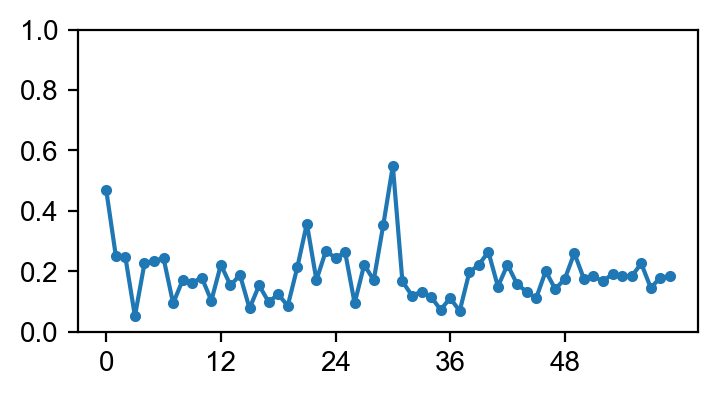

In [17]:
loss_rates = np.mean(np.sum(np.isnan(final_dna_hzxys_list), axis=2)>0, axis=0)
print(np.mean(loss_rates))
fig, ax = plt.subplots(figsize=(4,2),dpi=200)
ax.plot(loss_rates, '.-')
ax.set_ylim([0,1])
ax.set_xticks(np.arange(0,len(dna_reg_ids),int(len(dna_reg_ids)/5)))
plt.show()

In [18]:
np.where(loss_rates > 0.3)[0]+1

array([ 1, 22, 30, 31], dtype=int64)

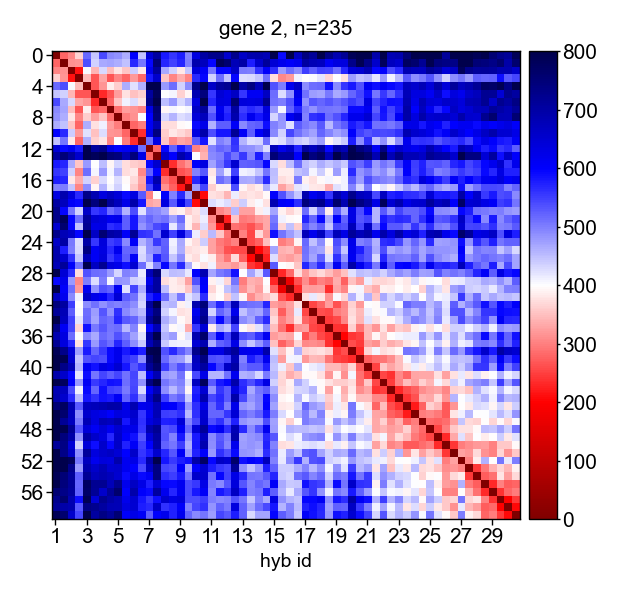

In [19]:
imaging_order = []
for _fd, _infos in fov.color_dic.items():
    for _info in _infos:
        if len(_info) > 0 and _info[0] == 'c':
            if int(_info[1:]) in dna_reg_ids:
                imaging_order.append(list(dna_reg_ids).index(int(_info[1:])))
imaging_order = np.array(imaging_order, dtype=np.int)
#kept_inds = imaging_order # plot imaging ordered regions

#kept_inds = np.where(np.array(dna_reg_channels) == '647')[0] # plot sepecific channel
#kept_inds = np.where(loss_rates<0.5)[0] # plot good regions only
kept_inds = np.arange(len(fov.combo_ids)) # plot all

%matplotlib inline

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(median_distmap[kept_inds][:,kept_inds], 
                                               color_limits=[0,800],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=500)
ax.set_title(f"gene {gid}, n={len(distmap_list)}", fontsize=7.5)

#_ticks = np.arange(0, len(kept_inds), 20)
_ticks = np.arange(0, len(kept_inds), 4)

ax.set_xticks(_ticks)
#ax.set_xticklabels(dna_reg_ids[kept_inds][_ticks])
#x.set_xlabel(f"10kb region id", fontsize=7, labelpad=2)
ax.set_xticklabels(np.array((dna_reg_ids[kept_inds][_ticks]-1)/2+1, dtype=np.int32))
ax.set_xlabel(f"hyb id", fontsize=7, labelpad=2)

ax.set_yticks(_ticks)
#ax.set_yticklabels(dna_reg_ids[kept_inds][_ticks])
#ax.set_ylabel(f"10kb region id", fontsize=7, labelpad=2)




#ax.axvline(x=np.where(dna_reg_ids[kept_inds]>300)[0][0], color=[1,1,0])
#ax.axhline(y=np.where(dna_reg_ids[kept_inds]>300)[0][0], color=[1,1,0])

plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

In [23]:
for _i in range(30):
    print(_i+1, np.round(fov.combo_drifts[_i*2], 2))

1 [0. 0. 0.]
2 [-0.02 13.39 -6.75]
3 [ -0.11  30.13 -11.16]
4 [ -0.11  30.64 -10.23]
5 [ -0.09  31.02 -10.46]
6 [-0.12 32.26 -9.65]
7 [-0.1  37.82 -9.63]
8 [-0.1  38.53 -9.34]
9 [ -0.08  34.51 -11.9 ]
10 [-0.08 34.84 -9.92]
11 [ 0.07 24.36 -7.38]
12 [ 0.16 26.14 -6.82]
13 [  0.08  26.8  -11.41]
14 [  0.12  26.99 -11.31]
15 [-0.06 25.97 -8.8 ]
16 [ -0.    27.96 -13.33]
17 [ -0.08  30.82 -10.12]
18 [ -0.11  28.77 -10.97]
19 [ -0.11  28.98 -10.46]
20 [-0.13 30.32 -9.69]
21 [ -0.11  13.7  -11.3 ]
22 [ -0.12  14.98 -13.41]
23 [-1.000e-02  1.630e+01 -1.297e+01]
24 [  0.08  22.94 -11.79]
25 [  0.06  22.43 -15.9 ]
26 [ 2.000e-02  2.002e+01 -1.060e+01]
27 [-0.12 20.59 -9.23]
28 [ 0.05 24.45 -7.46]
29 [ 0.11 26.76 -7.51]
30 [ 0.13 28.57 -8.4 ]


In [ ]:
20,27,
13,10



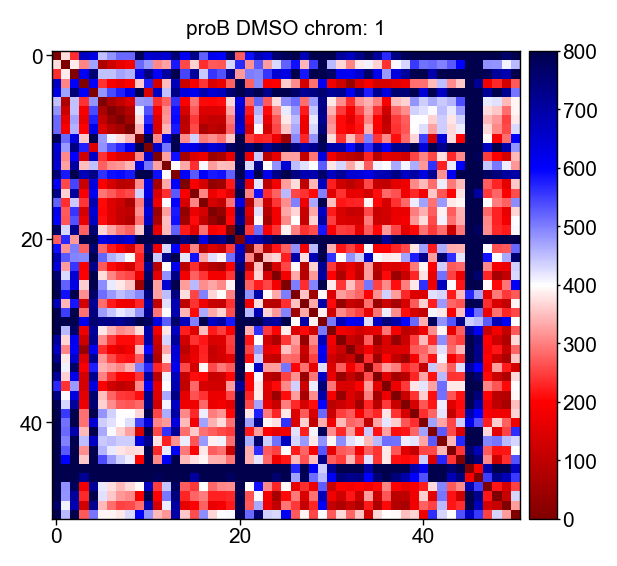

-- add colorbar with colornorm: <matplotlib.colors.Normalize object at 0x000001D5C35F30C8>


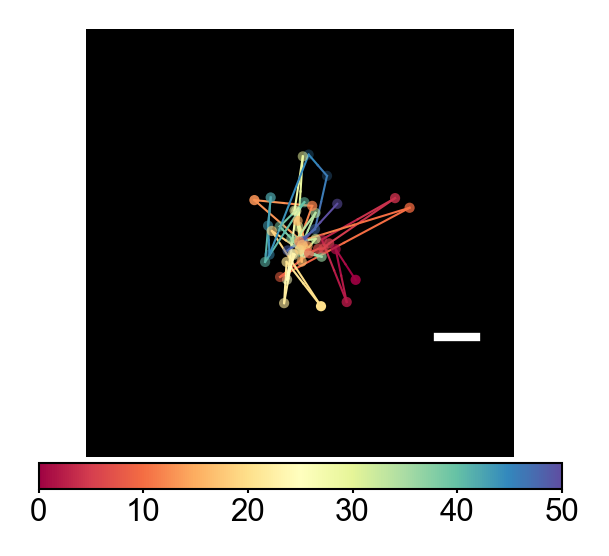

In [22]:
%matplotlib inline


reload(figure_tools.image)

chrom_id = 1

import matplotlib
import copy

sc_cmap = copy.copy(matplotlib.cm.get_cmap('seismic_r'))
sc_cmap.set_bad(color=[0.5,0.5,0.5,1])

valid_inds = np.where(np.isnan(final_dna_hzxys_list[chrom_id]).sum(1) == 0)[0]
#valid_inds = np.ones(len(final_dna_hzxys_list[chrom_id]), dtype=np.bool) # all spots

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(
        distmap_list[chrom_id][valid_inds][:,valid_inds], 
        color_limits=[0,800],
        ax=ax,
        cmap=sc_cmap,
        ticks=np.arange(0,150,20), 
        figure_dpi=200)
ax.set_title(f"proB DMSO chrom: {chrom_id}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

ax3d = figure_tools.image.chromosome_structure_3d_rendering(
        final_dna_hzxys_list[chrom_id][valid_inds, 1:], 
        marker_edge_line_width=0,
        reference_bar_length=200, image_radius=500, 
        line_width=0.5, figure_dpi=300, depthshade=True)
plt.show()

<IPython.core.display.Javascript object>


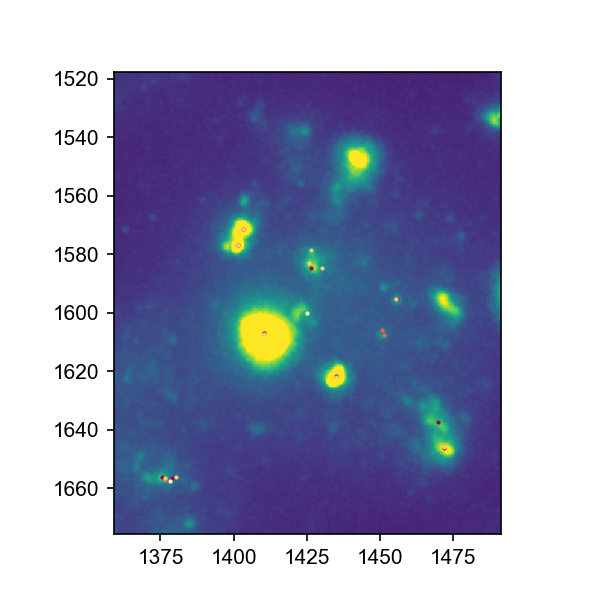

0
1
2
3


In [47]:
from matplotlib.cm import Spectral

plt.figure(figsize=(4,4), dpi=150)
plt.gca().invert_yaxis()
#plt.imshow(masks_2d)
plt.imshow(gene_ims[gene_id].max(0), vmin=1000, vmax=3000)

#for _rid, _uspots in enumerate(fov.unique_spots_list):
for _i, _rid in enumerate(gene_unique_rids):
    print(_i)
    _uspots = kept_gene_spots_list[_i]
    #_uspots = gene_spots_list[_i]
    plt.plot(_uspots[:,3], _uspots[:,2], '.', markersize=2, 
             color=Spectral(_i/len(gene_unique_rids) * 0.7) )

plt.show()

In [23]:
im_bg

1075.0

<IPython.core.display.Javascript object>


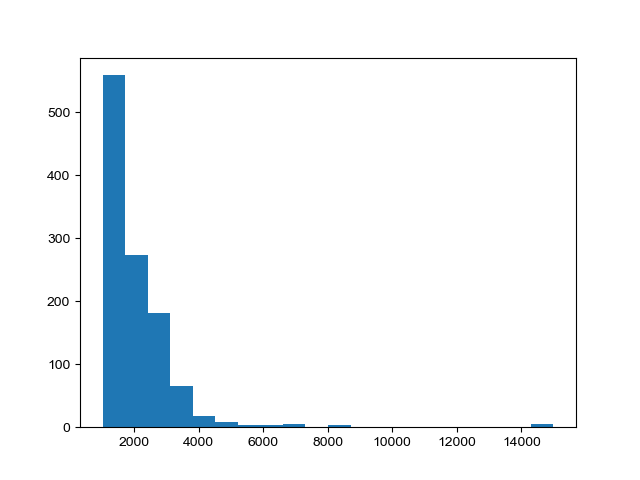

(array([559., 273., 182.,  66.,  17.,   9.,   3.,   4.,   5.,   0.,   3.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.]),
 array([ 1027.  ,  1725.15,  2423.3 ,  3121.45,  3819.6 ,  4517.75,
         5215.9 ,  5914.05,  6612.2 ,  7310.35,  8008.5 ,  8706.65,
         9404.8 , 10102.95, 10801.1 , 11499.25, 12197.4 , 12895.55,
        13593.7 , 14291.85, 14990.  ]),
 <a list of 20 Patch objects>)

In [21]:
plt.figure()
plt.hist(nb_max_ints, 20)

<IPython.core.display.Javascript object>


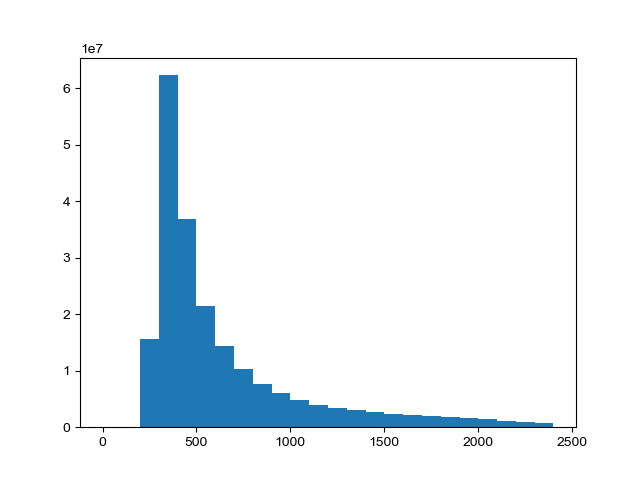

In [38]:
plt.figure()
plt.hist(np.ravel(fov.dapi_im), bins=np.arange(0,2500,100))
#plt.yscale('log')
plt.show()

In [23]:
intensity_th = 500

kept_raw_spots = []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    gene_combo_ims = _grp['ims'][gene_combo_rids]
    for _i, _rid in enumerate(gene_combo_rids):
        print(len(kept_gene_flags[_i]), len(_grp['raw_spots'][_rid]))
        kept_raw_spots.append(_grp['raw_spots'][_rid][np.where(kept_gene_flags[_i])[0]])

291 2000
271 2000
306 2000
280 2000


In [27]:
gene_unique_ims

array([[[[ 911, 1043,  994, ...,  790,  826,  730],
         [1025, 1061, 1020, ...,  836,  854,  746],
         [ 906, 1116, 1112, ...,  837,  771,  807],
         ...,
         [1036, 1008, 1033, ...,  741,  758,  803],
         [ 955,  959, 1024, ...,  836,  753,  819],
         [ 991,  952,  912, ...,  776,  813,  797]],

        [[ 869,  935,  967, ...,  680,  839,  809],
         [ 919, 1125, 1055, ...,  828,  848,  789],
         [ 990, 1065, 1028, ...,  923,  836,  862],
         ...,
         [ 902,  937, 1042, ...,  909,  761,  760],
         [ 869,  989, 1030, ...,  812,  778,  788],
         [ 906,  916, 1046, ...,  808,  710,  745]],

        [[ 836, 1069,  924, ...,  849,  809,  870],
         [1027, 1248, 1178, ...,  842,  931,  717],
         [1111, 1130, 1052, ...,  902,  883,  853],
         ...,
         [1060, 1062,  999, ...,  902,  778,  743],
         [ 991,  960, 1007, ...,  805,  896,  851],
         [ 946,  986,  986, ...,  852,  769,  692]],

        ...,

  

In [26]:
len(gene_unique_ims + [gene_ims[gene_id]])

4

<IPython.core.display.Javascript object>


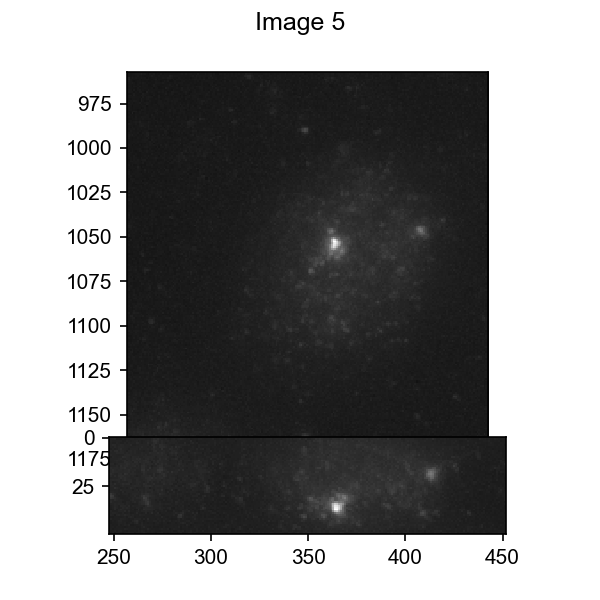

In [35]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(kept_raw_spots):
    _sel_spots = _spots
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(list(gene_unique_ims) + [gene_ims[gene_id]], 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

<IPython.core.display.Javascript object>


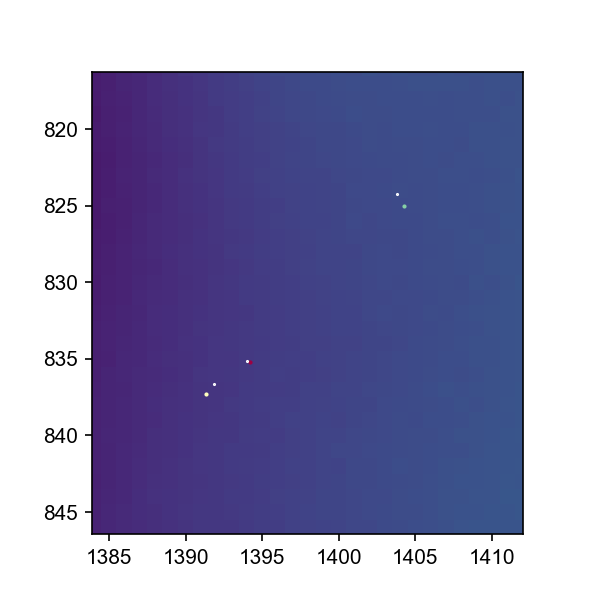

In [50]:
from matplotlib.cm import Spectral
int_th = 200

selected_rids = [0,1,2,3]

plt.figure(figsize=(4,4), dpi=150)
plt.gca().invert_yaxis()
#plt.imshow(masks_2d)
plt.imshow(fov.dapi_im.mean(0), vmin=1000, vmax=5000)

#for _rid, _uspots in enumerate(fov.unique_spots_list):
for _rid in selected_rids:
    _uspots = fov.unique_spots_list[_rid]
    
    unique_spots = fov.unique_spots_list[_rid]
    unique_spots = unique_spots[unique_spots[:,0] > int_th]
    combo_spots = fov.combo_spots_list[_rid]
    combo_spots = combo_spots[combo_spots[:,0] > int_th]

    unique_hzxys = spot_tools.picking.convert_spots_to_hzxys(unique_spots, fov.shared_parameters['distance_zxy'])
    combo_hzxys = spot_tools.picking.convert_spots_to_hzxys(combo_spots, fov.shared_parameters['distance_zxy'])

    kept_uinds = np.where(cdist(unique_hzxys, combo_hzxys).min(1) < 500)[0]
    kept_cinds = np.where(cdist(unique_hzxys, combo_hzxys).min(0) < 500)[0]

    _filtered_uspots = unique_spots[kept_uinds]
    _filtered_cspots = combo_spots[kept_cinds]
    #_filtered_uspots = _uspots[_uspots[:,0] > int_th]
    plt.plot(_filtered_uspots[:,3], _filtered_uspots[:,2], '.', markersize=2, 
             color=Spectral(_rid/len(selected_rids)) )
    plt.plot(_filtered_cspots[:,3], _filtered_cspots[:,2], '.', markersize=1, 
             color=[1,1,1])
    #break
plt.show()

<IPython.core.display.Javascript object>


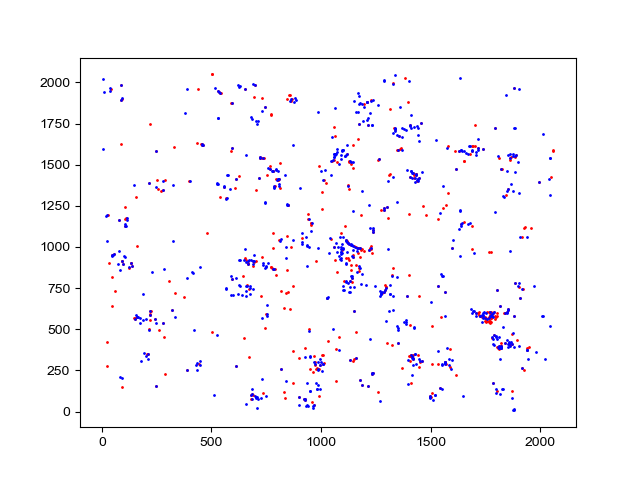

In [31]:
plt.figure()
plt.plot(unique_spots[:,2], unique_spots[:,3], 'r.', markersize=2)
plt.plot(combo_spots[:,2], combo_spots[:,3], 'b.', markersize=2)
plt.show()

In [ ]:
vis_unique_inds = [0,1,2,3,4]
vis_unique_ims, vis_unique_ids, vis_unique_spot_list, vis_unique_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    
    for _ind in vis_unique_inds:
        vis_unique_ims.append(_grp['ims'][_ind])
        vis_unique_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_unique_raw_spot_list.append(_grp['raw_spots'][_ind])

In [35]:
intensity_th = 500
vis_unique_inds = [0,1,2,3,4]
vis_unique_ims, vis_unique_ids, vis_unique_spot_list, vis_unique_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    
    for _ind in vis_unique_inds:
        vis_unique_ims.append(_grp['ims'][_ind])
        vis_unique_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_unique_raw_spot_list.append(_grp['raw_spots'][_ind][_grp['raw_spots'][_ind][:,0] > intensity_th])

<IPython.core.display.Javascript object>


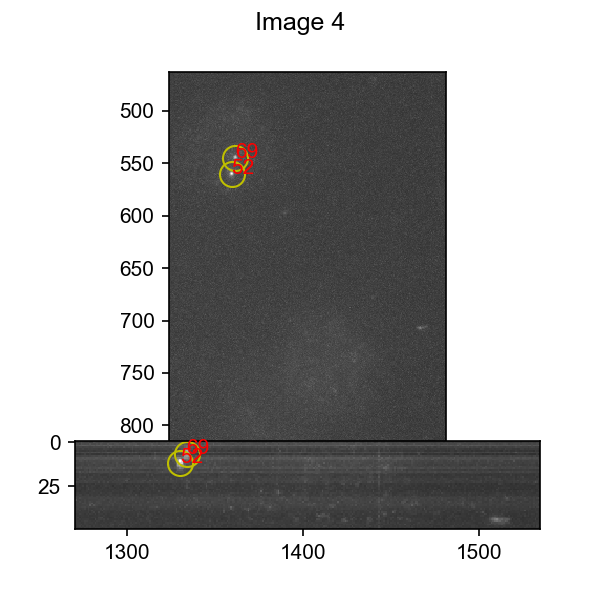

In [36]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_unique_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_unique_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

In [28]:
vis_combo_inds = [0,1,2,3,4]
vis_combo_ims, vis_combo_ids, vis_combo_spot_list, vis_combo_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    
    for _ind in vis_combo_inds:
        vis_combo_ims.append(_grp['ims'][_ind])
        vis_combo_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_combo_raw_spot_list.append(_grp['raw_spots'][_ind])

In [ ]:
p

<IPython.core.display.Javascript object>


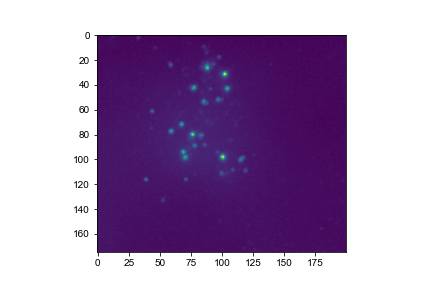

In [38]:
plt.figure()
plt.imshow(vis_combo_ims[1][:,375:550, 1200:1400].max(0))

In [65]:
spots = spot_tools.fitting.fit_fov_image(test_im, '647', th_seed=1000)

-- start fitting spots in channel:647, 66 seeded, 66 fitted in 2.382s.


In [56]:

reload(spot_tools.fitting)
test_im = vis_combo_ims[1][:,375:550, 1200:1400]

In [57]:
seeds = spot_tools.fitting.get_seeds(test_im, th_seed=3000)

In [58]:
len(seeds)

23

In [ ]:
coord_dict = {'coords':[np.flipud(_spot[:]) for _spot in seeds],
              'class_ids':np.zeros(len(seeds),dtype=np.int32),
             }

<IPython.core.display.Javascript object>


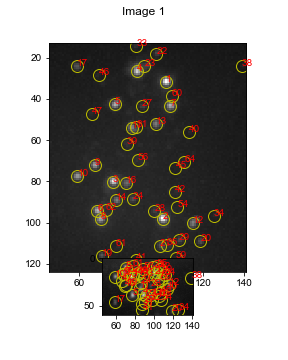

In [66]:
%matplotlib notebook

## visualize
coord_dict = {'coords':[np.flipud(_spot[1:4]) for _spot in spots],
              'class_ids':np.zeros(len(spots),dtype=np.int32),
             }


visual_tools.imshow_mark_3d_v2([test_im], 
                               given_dic=coord_dict,
                               save_file=None,
                               )

<IPython.core.display.Javascript object>


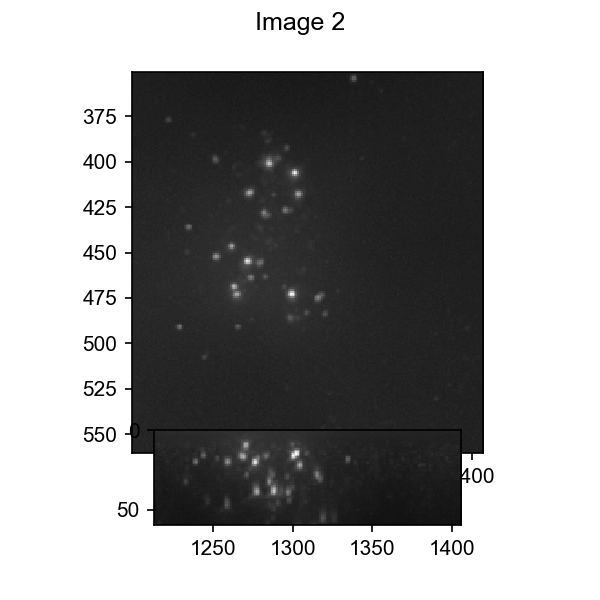

In [34]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_combo_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 500]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_combo_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

In [157]:
vis_merfish_inds = np.arange(0,11)
vis_merfish_ims, vis_merfish_ids, vis_merfish_spot_list, vis_merfish_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['merfish']
    
    for _ind in vis_merfish_inds:
        vis_merfish_ims.append(_grp['ims'][_ind])
        vis_merfish_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_merfish_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


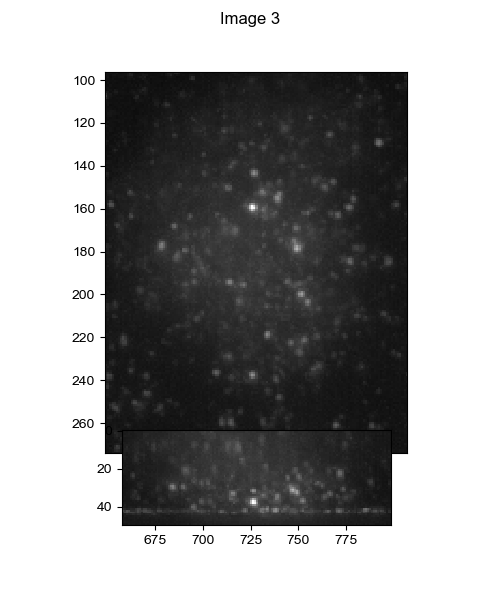

In [159]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_merfish_raw_spot_list):
    _sel_spots = _spots
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(5,6), dpi=100)    
    
visual_tools.imshow_mark_3d_v2(vis_merfish_ims, 
                               fig=fig,
                               #given_dic=coord_dict,
                               save_file=None,
                               )

In [35]:
classes.batch_functions._color_dic_stat(fov.color_dic, fov.channels, fov.shared_parameters['allowed_data_types']).keys()

dict_keys(['combo', 'unique', 'gene'])

In [51]:
vis_gene_inds = [0,1,2,3,4]
vis_gene_ims, vis_gene_ids, vis_gene_spot_list, vis_gene_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['gene']
    
    for _ind in vis_gene_inds:
        vis_gene_ims.append(_grp['ims'][_ind])
        vis_gene_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_gene_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


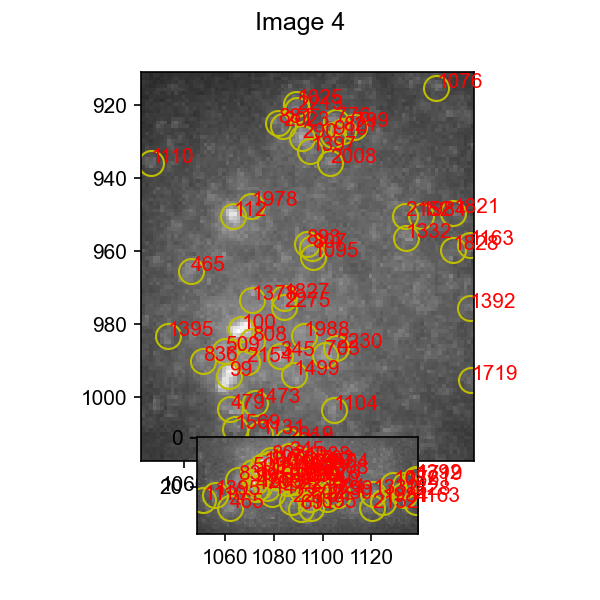

In [52]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_gene_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_gene_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

## Segmentation by Cellpose

In [7]:
import cv2
from cellpose import utils
from cellpose import models
model = models.Cellpose(gpu=True, model_type='nuclei')

** TORCH CUDA version installed and working. **
>>>> using GPU


In [9]:
dapi_im = fov._load_dapi_image()

directly return existing attribute.


<IPython.core.display.Javascript object>


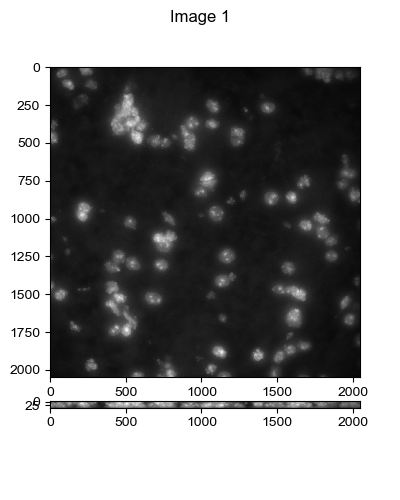

In [10]:
visual_tools.imshow_mark_3d_v2([dapi_im], )

In [51]:
# 2D segmentation
import cellpose
from cellpose import models
model_2d = models.Cellpose(gpu=True, model_type='nuclei')
masks_2d, flows_2d, styles_2d, diams_2d = model_2d.eval(fov.dapi_im[5:-5].max(0), 
                                                        diameter=60, channels=[0,0], 
                                                        min_size=20,
                                                        do_3D=False)

ModuleNotFoundError: No module named 'cellpose'

In [55]:
from skimage.segmentation import find_boundaries

In [57]:
find_boundaries(masks_2d)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

<IPython.core.display.Javascript object>


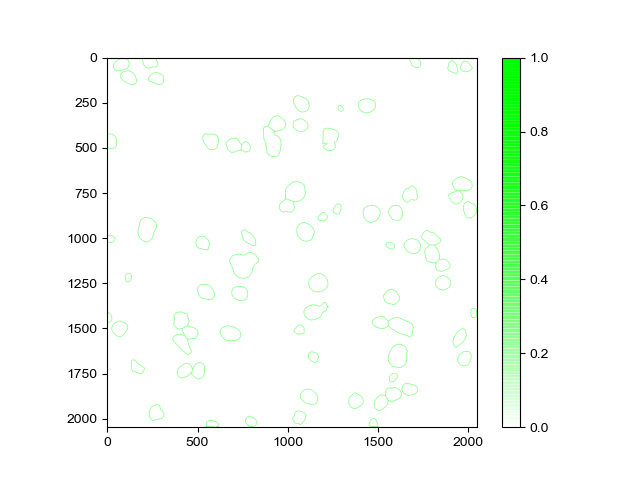

In [75]:
plt.figure()
plt.imshow(find_boundaries(masks_2d), cmap=figure_tools.color.transparent_gradient([0,1,0])
)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


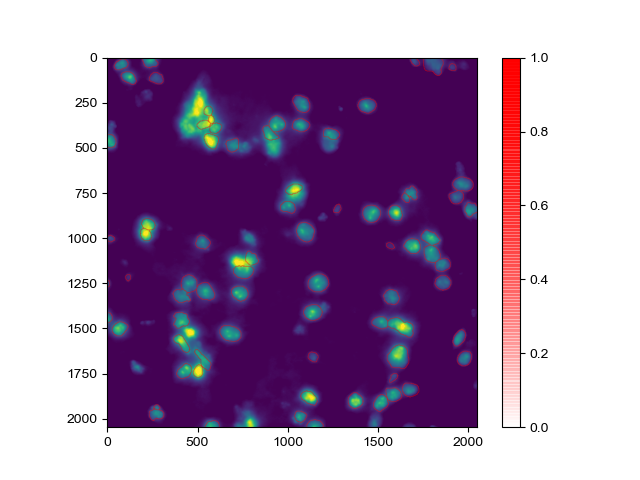

In [88]:
plt.figure()
plt.imshow(fov.dapi_im.mean(0), vmin=1000, vmax=5000)
plt.imshow(find_boundaries(masks_2d), cmap=figure_tools.color.transparent_gradient([1,0,0]))
plt.colorbar()
plt.show()

In [54]:
flows_2d

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[-1.2696758e-03, -2.1507517e-03,  4.8279762e-06, ...,
          -9.3707815e-04,  8.8630628e-04,  3.4075491e-03],
         [-8.8315830e-04, -2

<IPython.core.display.Javascript object>


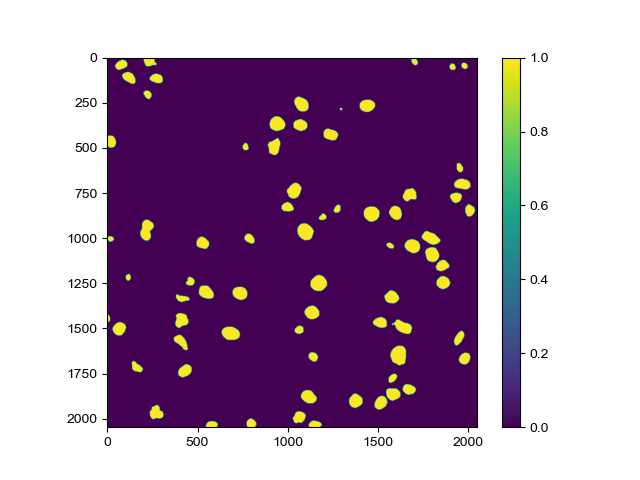

In [70]:
plt.figure()
plt.imshow(masks_2d>0)
plt.colorbar()
plt.show()

In [10]:
# test 3D segmentation
from cellpose import models
model_3d = models.Cellpose(gpu=False, model_type='nuclei')
masks_3d, flows_3d, styles_3d, diams_3d = model.eval(fov.dapi_im[10:30], diameter=50, channels=[0,0], do_3D=True)

>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 1 image(s)
multi-stack tiff read in as having 20 planes 1 channels

 running YX: 20 planes of size (2048, 2048) 




100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:32<00:00,  9.23s/it]



 running ZY: 2048 planes of size (20, 2048) 




100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [06:21<00:00,  1.49s/it]



 running ZX: 2048 planes of size (20, 2048) 




100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [06:08<00:00,  1.44s/it]


flows computed 3399.48s
dynamics computed 3416.00s
masks computed 3457.83s
estimated masks for 1 image(s) in 3554.92 sec
>>>> TOTAL TIME 3554.92 sec


In [11]:
masks.shape

(20, 2048, 2048)

In [9]:
import torch
torch.cuda.empty_cache()

In [36]:
del(model)

<IPython.core.display.Javascript object>


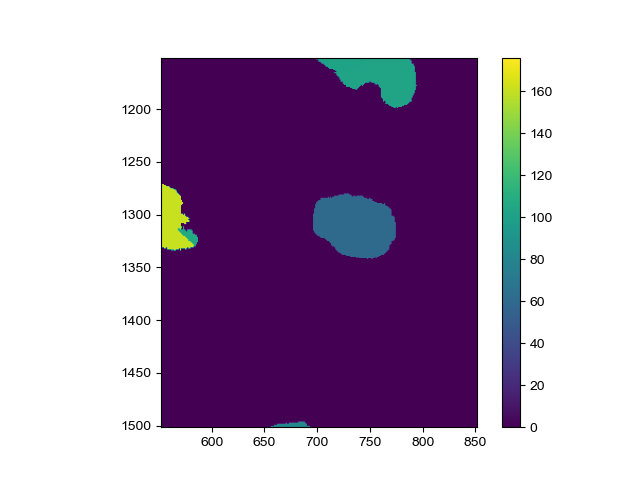

In [13]:
plt.figure()
plt.imshow(masks[10])
plt.colorbar()
plt.show()

In [ ]:
cellposeOutline

In [53]:
import imagedisplay as imdis 

ModuleNotFoundError: No module named 'imagedisplay'

In [ ]:
cellposeOutline = imdis.getMaskBoundaries(masks_cyto)
